In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

In [2]:
df_news = pd.read_csv('News_Final.csv')
df_facebook = pd.read_csv('Facebook_Economy.csv')

In [3]:
df_buzz = df_news.join(df_facebook, lsuffix='IDLink', rsuffix='IDLink')

In [4]:
df_buzz = df_buzz.dropna()

In [5]:
df_buzz.head()

,IDLinkIDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,...,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,...,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0,98.0
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,...,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0


In [6]:
df_buzz.columns

Index(['IDLinkIDLink', 'Title', 'Headline', 'Source', 'Topic', 'PublishDate',
       'SentimentTitle', 'SentimentHeadline', 'Facebook', 'GooglePlus',
       ...
       'TS135', 'TS136', 'TS137', 'TS138', 'TS139', 'TS140', 'TS141', 'TS142',
       'TS143', 'TS144'],
      dtype='object', length=156)

In [7]:
# using the sentiment scores on title and headlines as well as the popularity scores in the first hour to try and predict
# overall popularity on Facebook at the end of the run
X = df_buzz[['SentimentTitle', 'SentimentHeadline', 'TS1', 'TS2', 'TS3']]
Y = df_buzz['Facebook']

### OLS regression

In [8]:
OLS_model = linear_model.LinearRegression()

OLS_model.fit(X, Y)
OLS_score = OLS_model.score(X,Y)
OLS_score

0.00011861252724554293

In [14]:
cross_val_score(OLS_model, X, Y, cv=5)

array([-0.00601316, -0.00346049, -0.03657482, -0.00098937, -0.00083217])

### KNN regression

In [10]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_model.fit(X,Y)
knn_score = knn_model.score(X,Y)
knn_score

0.8634662344360811

In [15]:
knn_cross_val_score = cross_val_score(knn_model, X, Y, cv=5)
knn_cross_val_score

array([-0.19701107, -0.13061424, -0.1961453 , -0.13208633, -0.09677372])

In [12]:
k_score = []
for k in range(1,31):
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn.fit(X,Y)
    k_score.append(knn.score(X,Y))

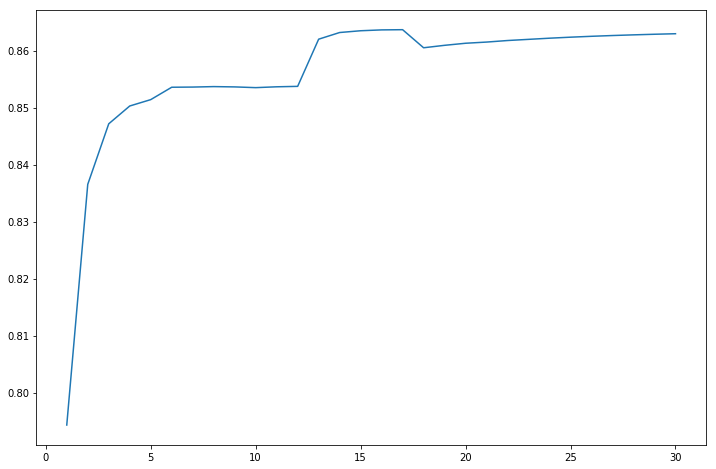

In [13]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.lineplot(x=list(range(1,31)),y=k_score)
plt.show()

### Write-up

Honestly, I'm incredibly surprised at how different the results turned out. I didn't expect for the OLS regression to not work at all while the KNN regression would be a pretty decent model. Also, the cross validation scores for the OLS model are very small and are consistent with the overall score of the model, identifying it further as not being useful. However, one thing that is concerning is the cross val scores on the knn model don't make much sense and are not consistent with the knn score of the model making me think there is some overfitting going on.

I also optimized the k-nearest neighbors model by using 15 n neighbors due to the graph above. Beyond 15 n neighbors there is diminishing returns. This is something that I think would continue to be helpful for KNN regressions being able to optimize the model's fit for noise or behaviors in the model. Since OLS regression doesn't allow this, it makes it a little more of a blackbox in terms of the line of best fit created. The ability to change the n neighbors parameter is a major positive for this type of model.

